# Loan Trader Demonstration

In [14]:
import Agents.Loan as Loan
import Agents.LoanInvestor as LoanInvestor
import Agents.LoanTrader as LoanTrader
import matplotlib.pyplot as plt

# Setting up a universe of loans and investors

The general goal here will be to demonstrate the process for a trade to clear step by step with a loan that the trader is holding for sale. 

### Creating the setup for loans to start trading

We will start with a universe in which there are a number of investors and a fewer number of loans

In [15]:
num_loans = 50
num_investors = 10


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]
trader = LoanTrader.LoanTraderObj()

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

loans_for_sale = [loan for loan in loans_list if loan.current_owner == "no owner"]
loans_for_sale.extend([Loan.LoanObj() for _ in range(1)])

trader.update_loans_for_sale(loans_for_sale)

In [16]:
for investor in investors_list:
    investor.update(cycle = 1)

trader.run_auction(show_bids=True)

Investor I53c6 bids 84.75303645412005 for loan 1a76b
Investor I5a56 bids 90.14831199377127 for loan 1a76b
Investor Idcfe bids 68.82854506133816 for loan 1a76b
Investor I0eb7 bids 85.30399228562963 for loan 1a76b
Investor I9ff6 bids 85.84143105974951 for loan 1a76b
Investor Ief92 bids 76.32330095573076 for loan 1a76b
Investor Ic67b bids 77.24135283126894 for loan 1a76b
Investor Id453 bids 80.25368107043715 for loan 1a76b
Investor I9cc6 bids 65.63860862923713 for loan 1a76b
Investor I6cce bids 51.5886254840797 for loan 1a76b
Purchased:  True
Top bidder is I5a56 with bid price 90.14831199377127 for $2317863.0308034215


# Looking at the Last Loan For Sale

In [17]:
loans_for_sale[-1].as_dict()

{'id': '1a76b170-7254-4ccb-a348-3638755376db',
 'maturity': 48,
 'current_cycle': 0,
 'starting_cycle': 0,
 'ending_cycle': 48,
 'time_to_maturity': 48,
 'pd': 0.08425110737562819,
 'size': 2571166.3141996185,
 'base_interest_rate': 0.02171211700246445,
 'interest_rate': 0.02171211700246445,
 'fair_value': 99.61638289065739,
 'market_price': 90.14831199377127,
 'current_owner': <Agents.LoanInvestor.LoanInvestorObj at 0x284b3f2b0>,
 'maturity_bool': False,
 'fair_value_history': [99.61638289065739],
 'market_price_history': [99.61638289065739, 90.14831199377127],
 'ownership_history': ['no owner',
  'T9ea7b366-0b22-4f72-ac95-31562fbf8ad7',
  'I5a5621cf-e7c2-4cb4-9212-36270a105e46'],
 'sale_price_history': [None, 90.14831199377127],
 'reserve_price': 79.69310631252591}

## Trading Loans Between Investors
The trader will have the ability to collect the loans for sale from investors and then run an auction to sell the loans. We'll use a similar set up from above and a limited pool of investors as a demonstration.

In [18]:
num_loans = 1
num_investors = 500
trader = LoanTrader.LoanTraderObj(max_investors=500)


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

In [19]:
for _ in range(100):     
    trader.collect_loans_for_sale(print_outputs=False, num_investors = 500)
    trader.run_auction(show_bids=False)

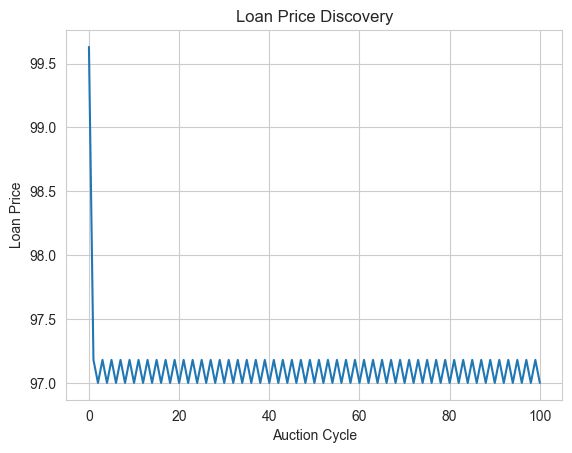

In [20]:
# plot to show loan price discovery in this universe of investors
plt.plot([loan.market_price_history for loan in loans_list][0])
plt.title("Loan Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()


From the plot above, we can see how there is eventially an ideal price that the loan will eventually reach after getting auctioned a number of times to match the most ideal investor for that particular loan based on it's score and the max bid. The idea of a reserve price allows this disovery to happen in a way that is not too costly for the originaly seller creating this slow decline type effect. 

## Adding in Multiple Loans

Below we see how price discovery becomes more complex for an individual loan when investors have a built portfolio. This is all under the assumption of a release at the initial cycle where no loans are updated until maturity. 

In [21]:
num_loans = 100
num_investors = 25
trader = LoanTrader.LoanTraderObj(max_investors=500)


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

In [22]:
for _ in range(100):     
    trader.collect_loans_for_sale(print_outputs=False, num_investors = 25)
    trader.run_auction(show_bids=False)

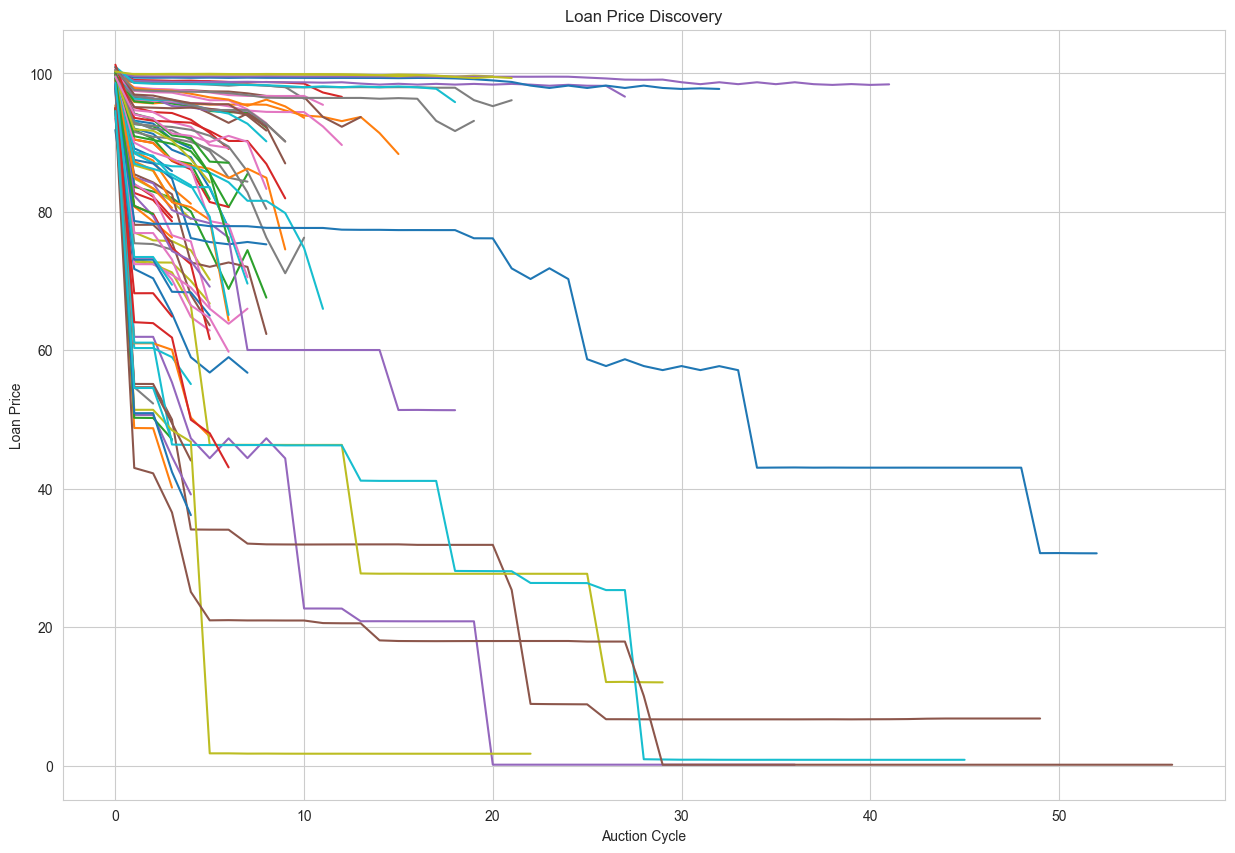

In [23]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot each sublist as a separate line in the line plot
for i, sublist in enumerate([loan.market_price_history for loan in loans_list]):
    plt.plot(sublist, label=f'Series {i+1}')

plt.title("Loan Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()

### Adding in Loan Updates

This is the most basic implementation of the entire loan market in which prices are discovered and loans are able to mature. In this case there is only one trader and 1000 loans across 25 investors. The plot below shows how the market price for loans changes over the course of the simulation. The market price is reflected as the most recent high bid for a loan that goes up for sale. 

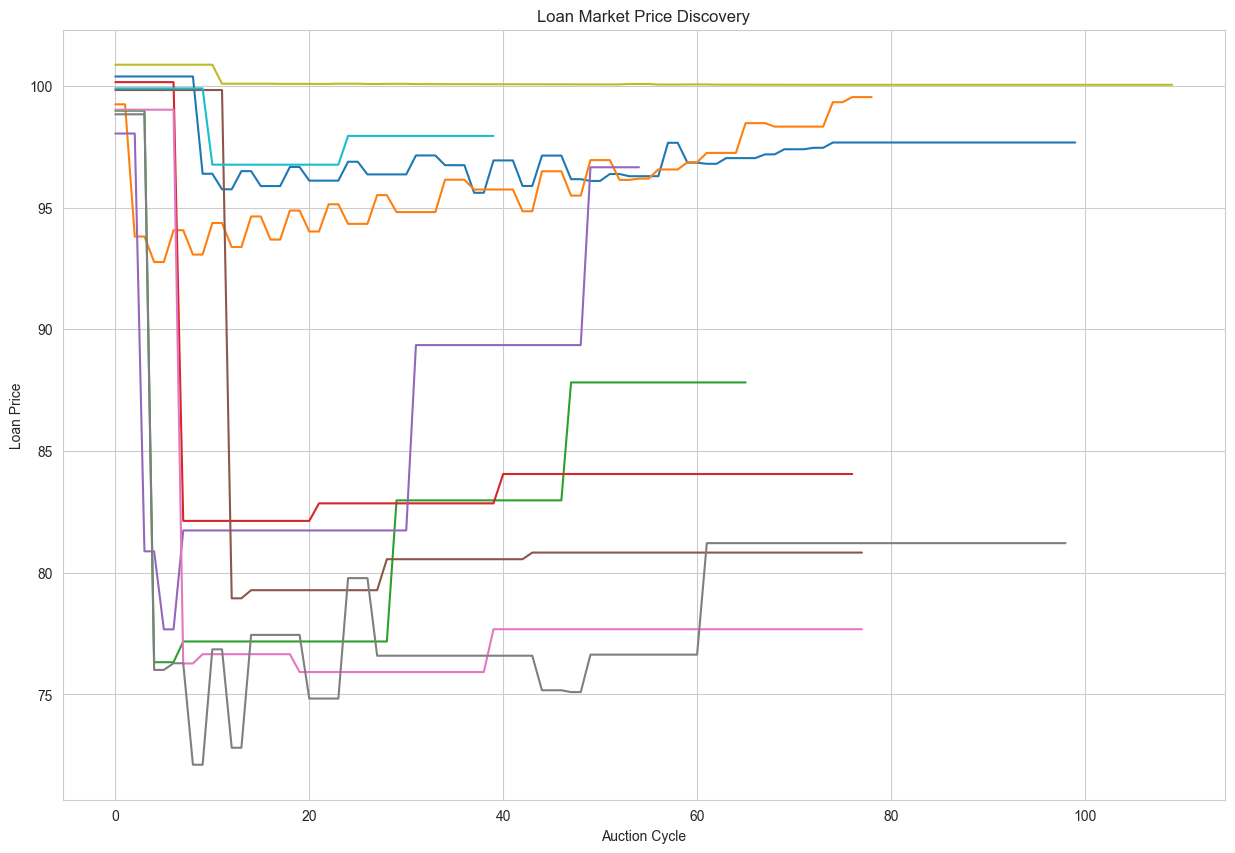

In [24]:
import Agents.Loan

num_loans = 10
num_investors = 25
trader = LoanTrader.LoanTraderObj(max_investors=500)

# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)

# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)
for _ in range(200):
    for investor in investors_list:
        investor.update(cycle=_)
    for loan in loans_list:
        loan.update(current_cycle=_)
    
    trader.update(cycle=_, num_investors=25)

# Plotting
plt.figure(figsize=(15, 10))

# plotting each loans market price history
for loan in loans_list:
    plt.plot(loan.market_price_history)

plt.title("Loan Market Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()

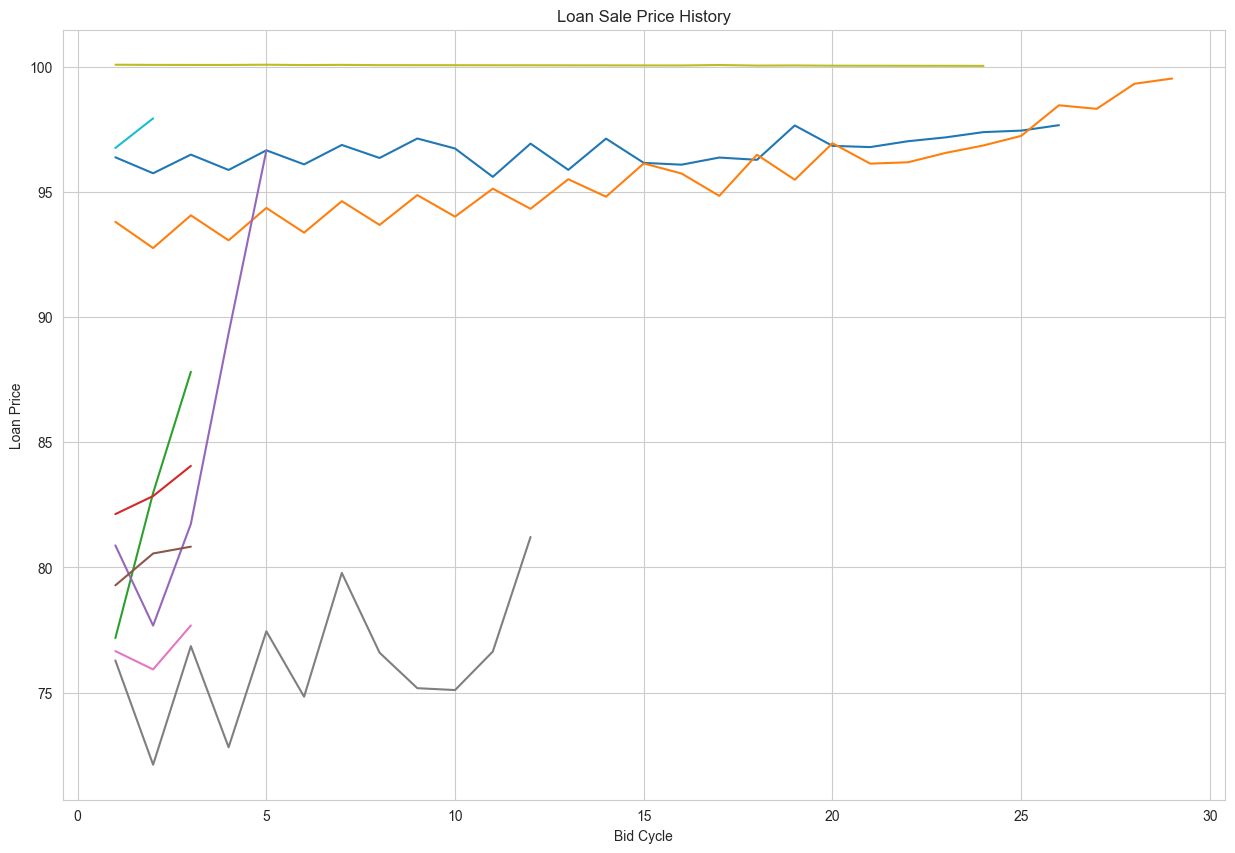

In [25]:
# Generating a plot similar to the above but for sale price history

plt.figure(figsize=(15, 10))
for i, sublist in enumerate([loan.sale_price_history for loan in loans_list]):
    plt.plot(sublist, label=f'Series {i + 1}')

plt.title("Loan Sale Price History")
plt.xlabel("Bid Cycle")
plt.ylabel("Loan Price")
plt.show()


In [26]:
# Getting information about the lowest prices loans in the simulation

lowest_price_loans = [loan for loan in loans_list if loan.market_price_history[-1] < 0.5]

print(len(lowest_price_loans))

for loan in lowest_price_loans:
    print(loan.as_dict())
    print(len(loan.market_price_history))

0
